In [14]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

from STARE_manager import STARE_manager

In [15]:
###### To select a dataset to analyze, uncomment all code under the dataset's name

### STARE Expert 1
data_set = "stare"
image_dir = "../Data/Dataset_1/Provided_masks/"
file_name = "im"
data_name = "DS1_"
results_dir = "../Results/Dataset_1/"

### STARE Expert 2
'''data_set = "stare"
image_dir = "../Data/Dataset_1/Provided_masks_VK/"
file_name = "im"
data_name = "DS1_"
results_dir = "../Results/Dataset_1_VK/"'''

#HRF
'''data_set = "HRF"
image_dir = "../Data/HRF_Dataset_1/Provided_masks/"
retinal_image_folder = "../Data/HRF_Dataset_1/Provided_retinal_images/*.png"
file_name = "im"
data_name = "DS1_"
results_dir = "../Results/HRF_Dataset_1/"'''

## all coarse
'''data_set = "all"
image_dir = "../Data/all/Provided_masks/"
file_name = "im"
data_name = "DS1_"
results_dir = "../Results/all/"'''

stare = STARE_manager(image_dir = image_dir,
                     file_name = file_name, 
                     data_name = data_name,
                     results_dir=results_dir,
                     data_set=data_set)

ID, data, diag =  stare.obtain_diagnoses(data_type="PI")

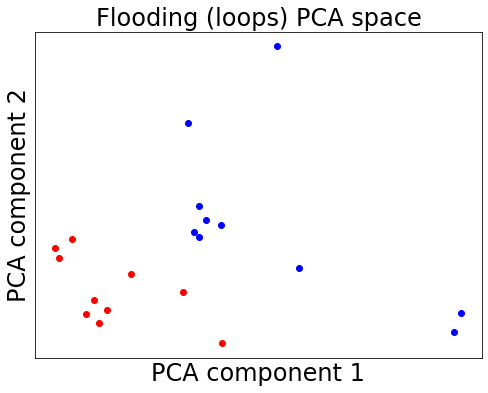

In [16]:
fontsize=24

filtration = "flooding"

X = data[filtration][:,2500:]

y = 1*(np.any(diag==0,axis=1))

pca = PCA(n_components=2)

mean = X.mean(axis=0)
X_norm = X - mean

X_pca = pca.fit_transform(X_norm) 

mpl.rc("xtick",labelsize=15)
mpl.rc("ytick",labelsize=15)
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

    
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(X_pca[y==0,0],X_pca[y==0,1],c="r",label="Diseased")
ax.scatter(X_pca[y==1,0],X_pca[y==1,1],c="b",label="Normal")

#for j, txt in enumerate(ID):
#    ax.annotate(txt, (X_pca[j,0], X_pca[j,1]))

#plt.legend(loc=2,fontsize=fontsize)

ax.set_xlabel("PCA component 1",fontsize=fontsize)
ax.set_ylabel("PCA component 2",fontsize=fontsize)
ax.set_title("Flooding (loops) PCA space",fontsize=fontsize)

ax.set_xticks([])
ax.set_yticks([])
#ax.set_xlim([-2,0])
#ax.set_ylim([-2,0])
plt.savefig(f"../Figures/PCA_flooding_{data_set}.pdf",format="pdf")